<a href="https://colab.research.google.com/github/chiffa-chan/lab1/blob/master/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 1. Подключение Pandas и NumPy
import pandas as pd
import numpy as np

In [0]:
# 2. Пример создания таблицы (DataFrame) с помощью кода
df_init = pd.DataFrame({
    'имя': ['ТЭЦ-4', 'ТЭЦ-5', 'ГЭС'],
    'мощность': [384, 1200, 480],
    'компания': ['СГК', 'СГК', 'РусГидро']
})

df_init.head()

,имя,мощность,компания
0,ТЭЦ-4,384,СГК
1,ТЭЦ-5,1200,СГК
2,ГЭС,480,РусГидро


In [0]:
# 3. Добавление строк
# Для добавления строк можно использовать функцию append. По сути здесь создается еще одна таблица тем же способом, что df_init. Затем добавляется к df_init
df_exted = df_init.append(pd.DataFrame({'имя': ['ТЭЦ-2', 'ТЭЦ-3'], 'мощность': [340, 511.5], 'компания': ['СГК', 'СГК']}), ignore_index = True)

# первые строки таблицы можно вывести на экран в более простом виде, применив функцию print.
print(df_exted)
print()

# Получение списка имен столбцов
print('имена столбцов:', df_exted.columns.values)

     имя  мощность  компания
0  ТЭЦ-4     384.0       СГК
1  ТЭЦ-5    1200.0       СГК
2    ГЭС     480.0  РусГидро
3  ТЭЦ-2     340.0       СГК
4  ТЭЦ-3     511.5       СГК

имена столбцов: ['имя' 'мощность' 'компания']


In [0]:
# Можно делать разничные визуальные эффекты, и управлять форматом отображения таблицных данных, 
# но здесь их рассматривать не будем (https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html).
df_exted.style.bar(color = '#00FF00', vmin = 0).format({'мощность': '{:.1f}'})

,имя,мощность,компания
0,ТЭЦ-4,384.0,СГК
1,ТЭЦ-5,1200.0,СГК
2,ГЭС,480.0,РусГидро
3,ТЭЦ-2,340.0,СГК
4,ТЭЦ-3,511.5,СГК


In [0]:
# 4. Добавление столбца.
# Например, добавим каждой станции условное обозначение - идентификатор
df_exted.insert(0, 'id', ['t4', 't5', 'g', 't2', 't3'])

print(df_exted)
print()

# Установка id в качестве индекса строки
df_exted = df_exted.set_index('id')

print(df_exted)

   id    имя  мощность  компания
0  t4  ТЭЦ-4     384.0       СГК
1  t5  ТЭЦ-5    1200.0       СГК
2   g    ГЭС     480.0  РусГидро
3  t2  ТЭЦ-2     340.0       СГК
4  t3  ТЭЦ-3     511.5       СГК

      имя  мощность  компания
id                           
t4  ТЭЦ-4     384.0       СГК
t5  ТЭЦ-5    1200.0       СГК
g     ГЭС     480.0  РусГидро
t2  ТЭЦ-2     340.0       СГК
t3  ТЭЦ-3     511.5       СГК


In [0]:
# 5. Сортировка
df_exted = df_exted.sort_values(['имя'])
print(df_exted)
print()

# ascending задает сортировку по убыванию или возрастанию
# по умолчанию True - сортировка по убыванию, если поставить False, то будет по возрастанию
df_exted = df_exted.sort_values(['мощность'], ascending = False)
print(df_exted)

      имя  мощность  компания
id                           
g     ГЭС     480.0  РусГидро
t2  ТЭЦ-2     340.0       СГК
t3  ТЭЦ-3     511.5       СГК
t4  ТЭЦ-4     384.0       СГК
t5  ТЭЦ-5    1200.0       СГК

      имя  мощность  компания
id                           
t5  ТЭЦ-5    1200.0       СГК
t3  ТЭЦ-3     511.5       СГК
g     ГЭС     480.0  РусГидро
t4  ТЭЦ-4     384.0       СГК
t2  ТЭЦ-2     340.0       СГК


In [0]:
# 6. Создание столбцов на основе вычислений.
# Чтобы случайно не испортить df_exted, будем работать с копией
df_exted_2 = df_exted.copy()

# Добавление столбца на основе формулы делается легко
df_exted_2['выработка_за_сутки'] = df_exted_2['мощность'] * 24 # 24 часа в сутках

# Сложности могут возникнуть когда нужно реализовать условия и работать с текстовыми данными.
# Например, нужно по названию определить тип электростанции.
# Условия можно задавать через NumPy функцию where, а поиск подстроки в строке через find.
# Так можно одной строкой задать целый алгоритм:
# если в имени есть ГЭС:
#   тип - ГЭС; 
# иначе 
#   если в имени есть ТЭЦ:
#     тип - ТЭЦ
#   иначе
#     тип - не определен

df_exted_2['тип'] = np.where(df_exted_2['имя'].str.find('ГЭС') >= 0, 'ГЭС', np.where(df_exted_2['имя'].str.find('ТЭЦ') >= 0, 'ТЭЦ', '?'))

print(df_exted_2)
print()

# Легко применить расчеты, используя несколько столбцов сразу
df_exted_2['проверка_расчетов'] =  df_exted_2['выработка_за_сутки'] / df_exted_2['мощность'] == 24
print(df_exted_2)

      имя  мощность  компания  выработка_за_сутки  тип
id                                                    
t5  ТЭЦ-5    1200.0       СГК             28800.0  ТЭЦ
t3  ТЭЦ-3     511.5       СГК             12276.0  ТЭЦ
g     ГЭС     480.0  РусГидро             11520.0  ГЭС
t4  ТЭЦ-4     384.0       СГК              9216.0  ТЭЦ
t2  ТЭЦ-2     340.0       СГК              8160.0  ТЭЦ

      имя  мощность  компания  выработка_за_сутки  тип  проверка_расчетов
id                                                                       
t5  ТЭЦ-5    1200.0       СГК             28800.0  ТЭЦ               True
t3  ТЭЦ-3     511.5       СГК             12276.0  ТЭЦ               True
g     ГЭС     480.0  РусГидро             11520.0  ГЭС               True
t4  ТЭЦ-4     384.0       СГК              9216.0  ТЭЦ               True
t2  ТЭЦ-2     340.0       СГК              8160.0  ТЭЦ               True


In [0]:
# 7. Выборка нужных фрагментов. Есть три основных способа выделения фрагментов.

# 7.1. Через имя столбца или столбцов
print('все данные из столбцов \'имя\' и \'мощность\'')
print(df_exted_2[['имя', 'мощность']])
print()
print('все данные из столбца \'имя\'')
print(df_exted_2.имя)
print()

# 7.2. Через loc по именам строк и столбцов
print('данные из строк \'g\' и \'t5\' и столбцов \'имя\' и \'мощность\'')
print(df_exted_2.loc[['g', 't5'], ['имя', 'мощность']])
print()
print('все данные из строки \'t2\'')
print(df_exted_2.loc[['t2']])
print()

# 7.3. Через iloc по номерам строк и столбцов, номера идут с нуля
print('данные из первой строки и второго столбца')
print(df_exted_2.iloc[1 , 2])
print()
print('данные из всех строк кроме двух последних и из столбцов со второго по четвертый включительно')
print(df_exted_2.iloc[: -2, 2 : 5])
print()
print('данные из нечетных строк и третьего столбца')
print(df_exted_2.iloc[ : : 2, 3])
print()

все данные из столбцов 'имя' и 'мощность'
      имя  мощность
id                 
t5  ТЭЦ-5    1200.0
t3  ТЭЦ-3     511.5
g     ГЭС     480.0
t4  ТЭЦ-4     384.0
t2  ТЭЦ-2     340.0

все данные из столбца 'имя'
id
t5    ТЭЦ-5
t3    ТЭЦ-3
g       ГЭС
t4    ТЭЦ-4
t2    ТЭЦ-2
Name: имя, dtype: object

данные из строк 'g' и 't5' и столбцов 'имя' и 'мощность'
      имя  мощность
id                 
g     ГЭС     480.0
t5  ТЭЦ-5    1200.0

все данные из строки 't2'
      имя  мощность компания  выработка_за_сутки  тип  проверка_расчетов
id                                                                      
t2  ТЭЦ-2     340.0      СГК              8160.0  ТЭЦ               True

данные из первой строки и второго столбца
СГК

данные из всех строк кроме двух последних и из столбцов со второго по четвертый включительно
    компания  выработка_за_сутки  тип
id                                   
t5       СГК             28800.0  ТЭЦ
t3       СГК             12276.0  ТЭЦ
g   РусГидро            

In [0]:
# 8. Удаление столбцов.
df_exted = df_exted_2.drop(['проверка_расчетов'], axis='columns')

print(df_exted)

      имя  мощность  компания  выработка_за_сутки  тип
id                                                    
t5  ТЭЦ-5    1200.0       СГК             28800.0  ТЭЦ
t3  ТЭЦ-3     511.5       СГК             12276.0  ТЭЦ
g     ГЭС     480.0  РусГидро             11520.0  ГЭС
t4  ТЭЦ-4     384.0       СГК              9216.0  ТЭЦ
t2  ТЭЦ-2     340.0       СГК              8160.0  ТЭЦ


In [0]:
# 9. Выборка данных по условию.
# Выбрать электростанции с мощностью выше 400 МВт
print(df_exted[df_exted['мощность'] > 400.])
print()

# Можно писать короче, если имя столбца не содержит пробела
print(df_exted[df_exted.мощность > 400.])
print() 

# Выбрать электростанции с мощностью выше 400 МВт и не от СГК
print(df_exted[(df_exted.мощность > 400.) & (df_exted.компания != 'СГК')])
print() 

# Выбрать электростанции с мощностью выше 1000 МВт или относящиеся к ГЭС
print(df_exted[(df_exted.мощность > 1000.) | (df_exted.тип == 'ГЭС')])

      имя  мощность  компания  выработка_за_сутки  тип
id                                                    
t5  ТЭЦ-5    1200.0       СГК             28800.0  ТЭЦ
t3  ТЭЦ-3     511.5       СГК             12276.0  ТЭЦ
g     ГЭС     480.0  РусГидро             11520.0  ГЭС

      имя  мощность  компания  выработка_за_сутки  тип
id                                                    
t5  ТЭЦ-5    1200.0       СГК             28800.0  ТЭЦ
t3  ТЭЦ-3     511.5       СГК             12276.0  ТЭЦ
g     ГЭС     480.0  РусГидро             11520.0  ГЭС

    имя  мощность  компания  выработка_за_сутки  тип
id                                                  
g   ГЭС     480.0  РусГидро             11520.0  ГЭС

      имя  мощность  компания  выработка_за_сутки  тип
id                                                    
t5  ТЭЦ-5    1200.0       СГК             28800.0  ТЭЦ
g     ГЭС     480.0  РусГидро             11520.0  ГЭС


In [0]:
# 10. Статистические расчеты по сгруппированным данным.
# Суммарная мощность по типа электростанций.
print(df_exted.groupby(['тип'])['мощность'].sum())
print()

# Максимальная мощность по типам электростанций.
print(df_exted.groupby(['тип'])['мощность'].max())
print()

# Число электростанций по мощности ниже и выше 500 МВт и разделением по компаниям
print(df_exted.groupby(['компания', df_exted['мощность'] > 500])['мощность'].count())
print()

тип
ГЭС     480.0
ТЭЦ    2435.5
Name: мощность, dtype: float64

тип
ГЭС     480.0
ТЭЦ    1200.0
Name: мощность, dtype: float64

компания  мощность
РусГидро  False       1
СГК       False       2
          True        2
Name: мощность, dtype: int64



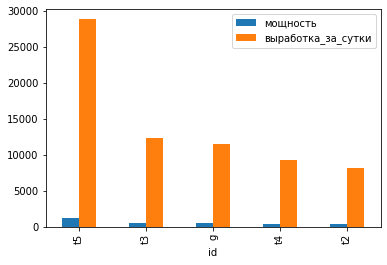

In [0]:
# 11. Быстрая визуализация данных.
# В предыдущей работе для визуализации данных применялись отдельные библиотеки.
# Но для быстрого получения графиков и гистограмм можно использовать очень простой код. 
df_exted.plot(kind = 'bar')
print()

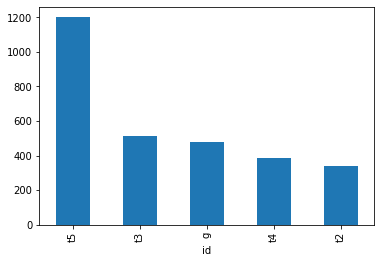

In [0]:
# 12. Выбор столбцов для визуализации
df_exted['мощность'].plot(kind = 'bar')
print()

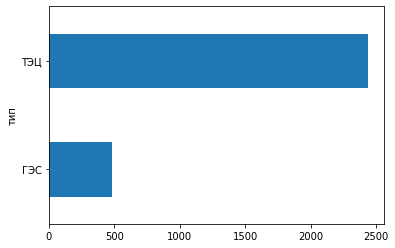

In [0]:
# 13. Гистограмма после группировки
df_exted.groupby(['тип'])['мощность'].sum().plot(kind = 'barh')
print()

In [0]:
# 14. Удаление строк по условию
df_del = df_exted.drop(df_exted[df_exted['мощность'] < 400].index)
print(df_del)

      имя  мощность  компания  выработка_за_сутки  тип
id                                                    
t5  ТЭЦ-5    1200.0       СГК             28800.0  ТЭЦ
t3  ТЭЦ-3     511.5       СГК             12276.0  ТЭЦ
g     ГЭС     480.0  РусГидро             11520.0  ГЭС
